Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Lastly, hit **Validate**.

If you worked locally, and then uploaded your work to the hub, make sure to follow these steps:
- open your uploaded notebook **on the hub**
- hit the validate button right above this cell, from inside the notebook

These  steps should solve any issue related to submitting the notebook on the hub.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vincent Chen"
COLLABORATORS = ""

---

# Homework 3: EDA of Bike Sharing

## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Due Date

** This assignment is due Tuesday, February 13 at 11:59pm **

## Introduction

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think creatively and critically about how the plots you have created provide insight into the data.

There are four parts to this assignment: 
* data preparation
* exploring the distribution of riders
* exploring the relationship between time and rider counts
* and exploring the relationship between weather and rider counts. 

In each section, you are given specific data cleaning tasks and/or a plot to reproduce.  

In [2]:
# Run this cell to set up your notebook.  Make sure utils.py is in this assignment's folder

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/sp18/raw/gh-pages/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Mon Feb 12 19:37:40 2018
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [4]:
# Run this cell to look at the top of the file.  No further action is needed
for line in utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [5]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [6]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1. Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, be sure to document the data transformation and leave the underlying datafile `bikeshare.txt` unmodified.

#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

In [7]:
# Modify holiday weekday, workingday, and weathersit here
# Hint: one strategy involves df.replace(...)

# YOUR CODE HERE
bike['holiday'].replace([0, 1], ['no', 'yes'], inplace = True)
bike['weekday'].replace([0, 1, 2, 3, 4, 5, 6], 
                        ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], inplace = True)
bike['workingday'].replace([0, 1], ['no', 'yes'], inplace = True)
bike['weathersit'].replace([0, 1, 2, 3], ['Clear', 'Mist', 'Light', 'Heavy'], inplace = True)

bike.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Mist,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Mist,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Mist,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Mist,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Mist,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
assert isinstance(bike, pd.DataFrame)
assert bike['holiday'].dtype == np.dtype('O')
assert list(bike['holiday'].iloc[370:375]) == ['no', 'no', 'yes', 'yes', 'yes']
assert bike['weekday'].dtype == np.dtype('O')
assert bike['workingday'].dtype == np.dtype('O')
assert bike['weathersit'].dtype == np.dtype('O')


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [9]:
num_holidays = bike[bike['holiday'] == 'yes'].shape[0]

In [10]:
assert 400 <= num_holidays <= 550


#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

Hint: `groupby` and `aggregate`.  `aggregate` admits the `sum` and `'last'` aggregation operators. 

In [11]:
# #daily_counts = 

# bike_frame = bike[['dteday', 'workingday', 'casual', 'registered']]
# #bike_frame.groupby(['dteday']).agg(['casual'])

# daily_counts = pd.DataFrame(columns=['index1', 'casual', 'registered', 'workingday'])
# daily_counts.set_index = bike['dteday'].unique()
# daily_counts['index1'] = bike['dteday'].unique()
# daily_counts['casual'] = bike_frame.groupby(['dteday'])[['casual']].sum()
# daily_counts['registered'] = bike_frame.groupby(['dteday'])[['registered']].sum()

# daily_counts['index1'] = bike['dteday'].unique()
# #daily_counts.set_index(daily_counts['index1'], inplace = True)

# #daily_counts['index'].set_
# daily_counts.head()

# bike_frame.groupby(['dteday'])[['casual']].sum()

# #tf.merge(df, how='left', on='vi')

# daily_counts.merge(bike_frame.groupby(['dteday'])[['casual']].sum(), how='left')
# daily_counts


# #type(daily_counts['index1'])
# bike_frame.groupby(['dteday'])['workingday'].value_counts()

# bike_frame.groupby(['dteday']).head()

# copy = bike_frame

# # Working Day to Dteday 
# copy = copy.drop_duplicates(subset=['workingday', 'dteday'], keep='first')
# daily_counts.head() #index1

# pd.merge(daily_counts, copy, how='left', left_on=['index1'], right_on=['dteday'])

# daily_counts = bike_frame.set_index('dteday')
# daily_counts['casual'] = daily_counts['casual'] = bike_frame.groupby(['dteday'])[['casual']].sum()
# daily_counts['registered'] = bike_frame.groupby(['dteday'])[['registered']].sum()
# copy = copy.set_index('dteday')

# daily_counts = daily_counts.drop_duplicates(keep='first')

# daily_counts.head()

In [12]:
# Takes columns of bike_frame. 
bike_frame = bike[['dteday', 'workingday', 'casual', 'registered']]

# Create empty data frame. 
daily_counts = pd.DataFrame(columns=['index1', 'casual', 'registered', 'workingday'])

# Copies data frame over, sets index to date. 
daily_counts = bike_frame.set_index('dteday')

# Sum casual.
daily_counts['casual'] = bike_frame.groupby(['dteday'])[['casual']].sum()

# Sum registered. 
daily_counts['registered'] = bike_frame.groupby(['dteday'])[['registered']].sum()

# Drop duplicate dates. 
daily_counts = daily_counts.drop_duplicates(keep='first')

daily_counts.head()

,workingday,casual,registered
dteday,,,
2011-01-01,no,331,654
2011-01-02,no,131,670
2011-01-03,yes,120,1229
2011-01-04,yes,108,1454
2011-01-05,yes,82,1518


In [13]:
assert np.round(daily_counts['casual'].mean()) == 848.0
assert np.round(daily_counts['casual'].var()) == 471450.0


## 2. Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

You may want to quickly review the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html).

**Hint:** *Don't forget to set the `plt.xlabel` as well as the labels for each distribution.*

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


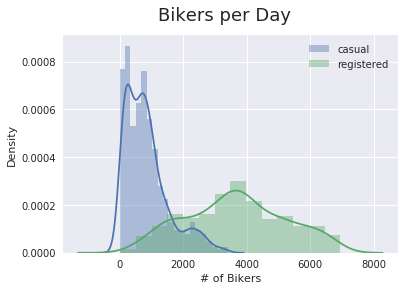

In [14]:
daily_counts.head()

fig = sns.distplot(daily_counts['casual'], label = 'casual');
fig = sns.distplot(daily_counts['registered'], label = 'registered');

fig.figure.suptitle("Bikers per Day", fontsize = 18)
fig.set(xlabel='# of Bikers', ylabel='Density');
plt.legend();

daily_counts.describe()

### Question 2b

Describe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions.

Casual bikers graph is much more narrow whereas the registered bikers is much more distributed. The mode for casual (3) is 968 and 120 bikers, whereas the mode for registered bikers (4) is 4841, 6248, and 1707. Casual bikers is skewed to the right with a tail to the right, whereas registered is evenly distributed. There are some gaps for casual right in the middle, and registered is more evenly distributed. The outliers for casual minimum is 2, and registered is 20. The max is 3410 and 6946, respectively. The mean for both is 848.17 and 3565.17, with a std of 686.62 and 1560.26, for casual and registered respectively. 

### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help with over plotting.

* **Hint 1:** *Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html)*.

* **Hint 2:** *You will need to set `x`, `y`, and `hue` and the `scatter_kws`*.

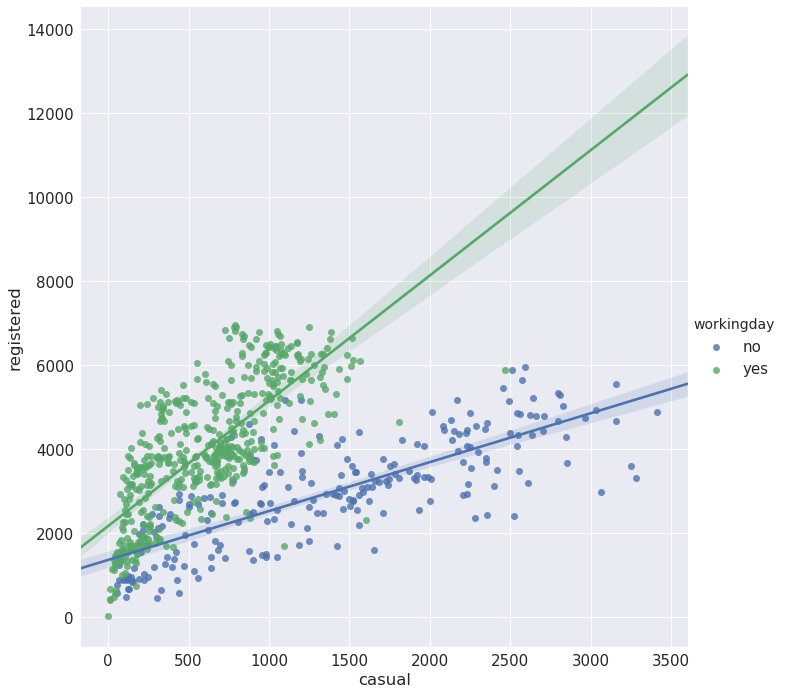

In [15]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)
sns.lmplot(x='casual', y='registered', hue="workingday", data=daily_counts, size = 10);


### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?
Why might we be concerned with overplotting in examining this relationship? 


Depending on whether it's a working day or not, we note from the registered v casual plot that there are clearly two different graphs going on. If it is a workingday, then all plots in the bottom right are used, whereas if it's not a business day, then there are much more casual bikers. There is a correlation between registered bikers and workingdays, and casual bikers and non-workingdays. In examining this relationship, overplotting can occur if those dates just happen to coincide and there are in fact no conclusions to be formed. Additionally, we may not be able to see the areas where they both coincide (unable to see high density areas).

## Question 3

### Question 3a Bivariate Kernel Density Plot
 
The scatter plot you made in question 2c makes clear the separation between the work days and non-work days.  However, the overplotting
makes it difficult to see the density of the joint counts. To address this
issue, let's try visualizing the data with another technique, the kernel density plot.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="600px" />

Making this plot can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

* **Hint 1:** *You will need to make more than one KDE plot.*
* **Hint 2:** *You will want to set the `cmap` to `"Reds"` and `"Blues"` or at least two contrasting colors. *

pandas.core.series.Series

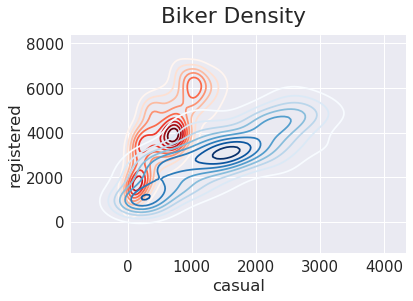

In [16]:
# Set 'ind' to a boolean condition that will allow you to filter daily_counts for rows corresponding to workingdays
ind = daily_counts['workingday'] == 'yes'

# For weekends
no = daily_counts['workingday'] == 'no'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and ind to splice out the relevant rows and column (casual/registered)
casual_weekday = daily_counts['casual'].loc[ind]
registered_weekday = daily_counts['registered'].loc[ind]

# For weekends
casual_weekend = daily_counts['casual'].loc[no]
registered_weekend = daily_counts['registered'].loc[no]

# Use sns.kdeplot to plot the bivariate KDE for weekday rides
fig = sns.kdeplot(casual_weekday, registered_weekday, cmap = 'Reds');

# Repeat the same steps above but for rows corresponding to non-workingdays
fig = sns.kdeplot(casual_weekend, registered_weekend, cmap = 'Blues');

# Title of Title for Graph 
fig.figure.suptitle("Biker Density");

type(ind)

#plt.legend();

### Question 3b

What does the contour plot reveal about the relationship between casual and registered riders for both work days and non-work days? How is it an improvement over the scatter plot you created in Q2c?

We can see from the casual and registered riders that there are aras where contours are shared between work days and non-work days. This is most notably through the ~50 of casual bikers and ~1800 registered bikers. However, we can also see the dense area found for weekdays and weekends, by which we note that registered weekday is around 4000 and 2000, and casual 50 or 800. The otherside for weekend is 1000 and 3000, and then 250 and 1500 bike riders. 

It's an improvement because there's the color scheme exemplifies the density of weekday and weekends, compared to highly dense dots that are harder to visualize and differentiate.

### Question 3c

As an alternative approach, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders and the two "margin" plots provide the univariate kernel density estimate of each of these variables. 

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

Hints:
* Take a look at `sns.jointplot` and its `kind` parameter. 
* `set_axis_labels` can be used to rename axes

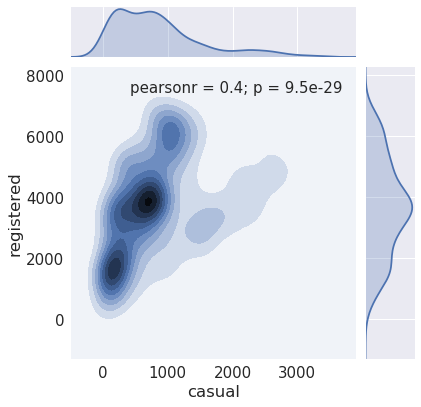

In [17]:
sns.jointplot('casual', 'registered', data=daily_counts, kind='kde')

## 4. Exploring Ride Sharing and Time

### Question 4a

Plot number of riders for each hour of each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like this:

<img src="images/june_riders.png" width="600px" />

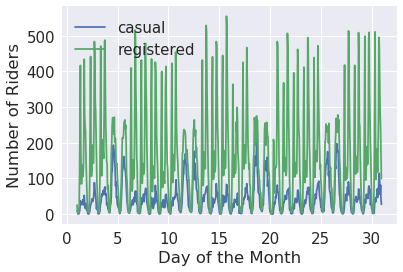

In [18]:
june = bike[(bike['yr'] == 0) & (bike['mnth'] == 6)][['dteday', 'hr', 'casual', 'registered']]
june['day'] = [int(x[8:]) for x in june['dteday']]
june['day'] = june['day'] + june['hr'] / 24


plt.plot(june.day, june.casual);
plt.plot(june.day, june.registered);
plt.xlabel('Day of the Month');
plt.ylabel('Number of Riders');
plt.legend();

#### Question 4b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines?

There seems to be a pattern found in incrememnts; there are five sections of increment found from the riders. There is a drop is riders on day 5, 10, 18, and 25, and increase of riders elsewhere. The interesting trend and pattern seen is that when there is a decrease in registered riders, there's an increase in casual riders, and vice versa.

## 5. Understanding Daily Patterns

### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the entire dataset, stratified by rider type.  

Your plot should look like the following:

<img src="images/diurnal_bikes.png" width="600px"/>

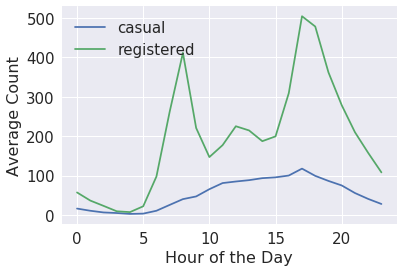

In [19]:
june1 = june.groupby(june['hr']).sum()
june1['casual'] = june1['casual'].apply(lambda x: x/24)
june1['registered'] = june1['registered'].apply(lambda x: x/24)
june1 = june1.drop(['day'], axis = 1)

fig = june1.plot.line();
plt.xlabel('Hour of the Day', fontsize=16);
plt.ylabel('Average Count', fontsize=16);

### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.

It appears that most registered riders peak at around 8-9 am, and around 17, or 5 pm. This correlates with the beginning and end of the work day. However, casual riders peaks at 17, which is 5 pm. Casual bikers bike around after work, whereas registered bikers bike to and from work.

## 6. Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6a
Create a new column `prop_casual` in the `bike` dataframe representing the proportion of casual riders out of all riders.

In [20]:
bike['prop_casual'] = bike['casual'] / bike['cnt']

In [21]:
assert int(bike["prop_casual"].sum()) == 2991

### BEGIN HIDDEN TEST
assert np.round(bike["prop_casual"].mean(), 2) == 0.17
### END HIDDEN TEST

### Question 6b
In order to examine the relationship between proportion of casual riders and temerature, we can make some bivariate scatterplot using `sns.lmplot`. We can even use color/hue to encode the information about day of week. Run the following cells to create such plots. (The plot contains many points, so it may take a while to render)

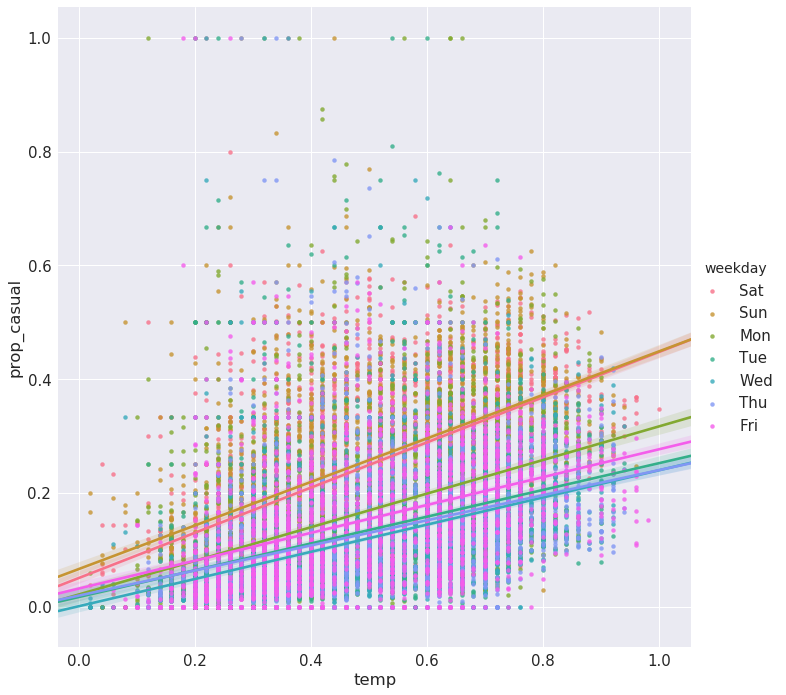

In [22]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, size=10)

As you can see from the scatterplot, many points are overlapping. Though the plot can show some trends, it would be hard to verify your findings. Therefore we could fit some curves to summarize the data and plot the curves instead.

Basically you will need to make a plot like this: Fit and plot curves using data from different weekdays. 

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You will need to use the function [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) to fit a curve from two sequences `x` and `y`. An example on a random data set is given below.



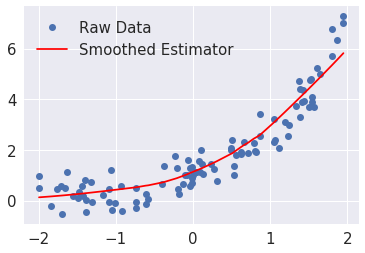

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2) #random data from -2 to 2
yobs = np.exp(xobs) + np.random.randn(100) / 2.0 #random data from -1 to 7
plt.plot(xobs, yobs, 'o', label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
plt.plot(xobs, ysmooth, 'r-', label="Smoothed Estimator")
plt.legend();

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Mist,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
5,6,2011-01-01,1,0,1,5,no,Sat,no,Light,0.24,0.2576,0.75,0.0896,0,1,1,0.000000
6,7,2011-01-01,1,0,1,6,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,2,0,2,1.000000
7,8,2011-01-01,1,0,1,7,no,Sat,no,Mist,0.20,0.2576,0.86,0.0000,1,2,3,0.333333
8,9,2011-01-01,1,0,1,8,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,1,7,8,0.125000
9,10,2011-01-01,1,0,1,9,no,Sat,no,Mist,0.32,0.3485,0.76,0.0000,8,6,14,0.571429


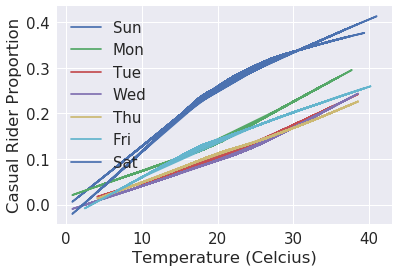

In [25]:
bike['new_temp'] = bike['temp'] * 41

dic = {0:'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
for i in range(7):
    weekday = dic[i]
    day = bike[bike['weekday'] == weekday]
    xobs = day.new_temp
    yobs = day.prop_casual
    ysmooth = lowess(yobs, xobs, return_sorted=False)
    plt.plot(xobs, ysmooth, label = weekday)

plt.xlabel('Temperature (Celcius)');
plt.ylabel('Casual Rider Proportion');
plt.legend();
plt.show()

### Question 6c
What can you discover from the curve plot? How is the `prop_casual` changing as a function of temperature?

We can note that as the temperature increases, the proportion of casual riders increases as well. This can be most noted through riders on Saturday and Sunday, going up to about 40% of the riders. Weekday riders also increase in the same fashion in regards to temperature vs proportion.

# Submission

You're done!

In order to turn in this assignment, submit this notebook to the Data 100 datahub at http://data100.datahub.berkeley.edu. 

You will need to upload this notebook and any associated files to datahub manually if you have completed this assignment on your local machine. Detailed instructions for how to submit on Datahub can be found at http://www.ds100.org/sp18/materials.

Remember to click 'Validate' for this assignment before submitting. After clicking 'Submit', you can verify there is a time-stamped submission under 'Submitted assignments'.